<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/Proyecto_final_Sergio_1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Detección de Fraude en Transacciones**
# Objetivo: Identificar transacciones fraudulentas a partir de patrones en los datos.

El presente proyecto realiza una comparacion de algunos algoritmos de Machine learning aplicados al conjunto de datos de clasficaicon de transacciones fraudulentas de tarjetas de credito.

Debido a la gran cantidad de tecnicas de machine learning y de procesamiento de grandes cantidades de conjunto de datos se hace complicado obtener resultados buenos de clasificacion.

In [1]:
pip install tensorflow


In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
# Cargar el conjunto de datos
df = pd.read_csv('creditcard.csv')

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
7121/7121 [==============================] - 23s 3ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 4/10
7121/7121 [==============================] - 20s 3ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 19s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 21s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0031 - val_ac

El entrenamiento del modelo parece ser bastante efectivo, ya que la pérdida (loss) y la precisión (accuracy) tanto en el conjunto de entrenamiento como en el conjunto de validación son bastante buenas

In [6]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Las predicciones son probabilidades, conviértelas en clases (0 o 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Comparar las predicciones con las etiquetas reales
accuracy = np.mean(y_pred_classes.flatten() == y_test)

print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')


1781/1781 [==============================] - 6s 3ms/step
Precisión en el conjunto de prueba: 99.92%


Graficando

calculará las probabilidades predichas (y_pred_probs) y luego utilizará estas probabilidades para calcular y visualizar la curva ROC.

1781/1781 [==============================] - 3s 2ms/step


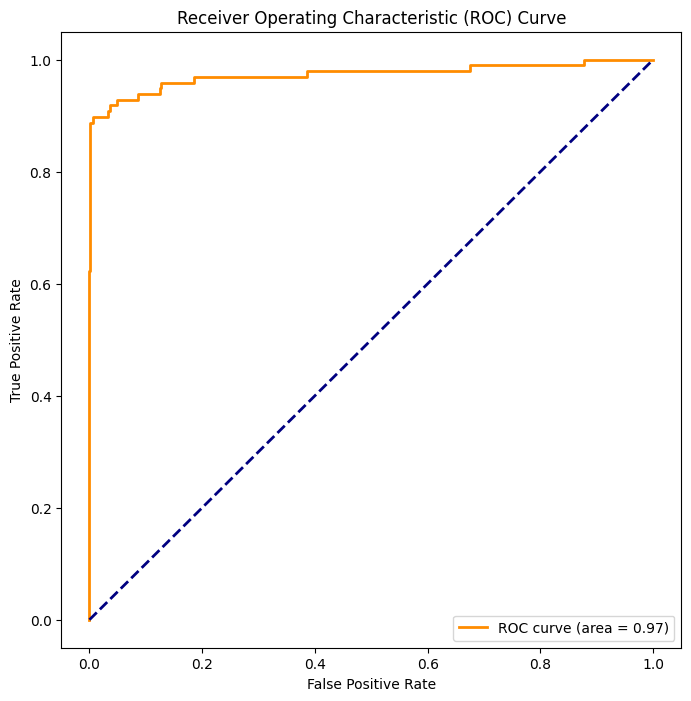

In [9]:
# Calcular las probabilidades predichas
y_pred_probs = model.predict(X_test)

# Importar funciones para calcular la curva ROC
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el área bajo la curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
